# import libraries

In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.metrics.pairwise import nan_euclidean_distances

# importing data from csv file

In [6]:
df = pd.read_csv('data.csv') 
data_original = df.copy()
df.head()

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,North
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,North
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,East
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,North
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,West


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     112 non-null    int64  
 1   maxO3          96 non-null     float64
 2   T9             75 non-null     float64
 3   T12            79 non-null     float64
 4   T15            75 non-null     float64
 5   Ne9            78 non-null     float64
 6   Ne12           70 non-null     float64
 7   Ne15           80 non-null     float64
 8   Vx9            94 non-null     float64
 9   Vx12           102 non-null    float64
 10  Vx15           91 non-null     float64
 11  maxO3v         100 non-null    float64
 12  WindDirection  112 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 11.5+ KB


In [8]:
df.dtypes

Unnamed: 0         int64
maxO3            float64
T9               float64
T12              float64
T15              float64
Ne9              float64
Ne12             float64
Ne15             float64
Vx9              float64
Vx12             float64
Vx15             float64
maxO3v           float64
WindDirection     object
dtype: object

In [9]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [10]:
df.head()

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,1
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,1
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,0
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,1
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,3


# finding how many values are empty in the table

In [11]:
df.isnull().sum(axis = 0)

Unnamed: 0        0
maxO3            16
T9               37
T12              33
T15              37
Ne9              34
Ne12             42
Ne15             32
Vx9              18
Vx12             10
Vx15             21
maxO3v           12
WindDirection     0
dtype: int64

# making function to find values with value zero.

In [12]:
def find_zero():
    for column_name in df.columns:
        column = df[column_name]
        # Get the count of Zeros in column 
        count = (column == 0).sum()
        print('Count of zeros in column ', column_name, ' is : ', count)

In [13]:
find_zero()

Count of zeros in column  Unnamed: 0  is :  0
Count of zeros in column  maxO3  is :  0
Count of zeros in column  T9  is :  0
Count of zeros in column  T12  is :  0
Count of zeros in column  T15  is :  0
Count of zeros in column  Ne9  is :  1
Count of zeros in column  Ne12  is :  4
Count of zeros in column  Ne15  is :  6
Count of zeros in column  Vx9  is :  8
Count of zeros in column  Vx12  is :  4
Count of zeros in column  Vx15  is :  6
Count of zeros in column  maxO3v  is :  0
Count of zeros in column  WindDirection  is :  10


# Normalizing the data.
## Making same scale for each variable between (0,1)

In [14]:
df_norm = (df-df.min())/(df.max()-df.min())
df = df_norm

In [15]:
df.head()

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,0.000000,0.362903,0.307143,0.218750,NaN,0.500,0.500,1.000,0.655701,0.426693,0.647332,0.338710,0.333333
1,0.003040,0.322581,NaN,NaN,NaN,0.625,0.625,0.875,0.271394,0.268291,0.467647,0.362903,0.333333
2,0.006079,0.403226,0.285714,0.171875,0.223301,0.250,NaN,NaN,0.828539,NaN,0.742069,0.322581,0.000000
3,0.009119,0.580645,0.350000,0.281250,NaN,0.125,0.125,0.000,NaN,0.569011,0.687939,0.403226,0.333333
4,0.012158,0.419355,NaN,0.322917,0.266990,NaN,NaN,NaN,0.564334,0.340620,0.363977,0.580645,1.000000


# Removing cetegorical data and id which could make disturbance in our data.

In [16]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('WindDirection',axis = 1, inplace = True)

# Imputing zero where columns are empty.

In [17]:
df_imputing_zero = df.fillna(0)
df = df_imputing_zero
df

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
0,0.362903,0.307143,0.218750,0.000000,0.500,0.500,1.000,0.655701,0.426693,0.647332,0.338710
1,0.322581,0.000000,0.000000,0.000000,0.625,0.625,0.875,0.271394,0.268291,0.467647,0.362903
2,0.403226,0.285714,0.171875,0.223301,0.250,0.000,0.000,0.828539,0.000000,0.742069,0.322581
3,0.580645,0.350000,0.281250,0.000000,0.125,0.125,0.000,0.000000,0.569011,0.687939,0.403226
4,0.419355,0.000000,0.322917,0.266990,0.000,0.000,0.000,0.564334,0.340620,0.363977,0.580645
...,...,...,...,...,...,...,...,...,...,...,...
107,0.000000,0.142857,0.000000,0.140777,0.375,0.625,0.000,0.602576,0.475813,0.601269,0.274194
108,0.282258,0.350000,0.338542,0.000000,0.000,0.000,0.000,0.549450,0.406639,0.000000,0.233871
109,0.459677,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.717301,0.605044,0.769138,0.000000
110,0.330645,0.000000,0.000000,0.000000,0.000,0.625,0.375,0.296642,0.284976,0.389706,0.459677


In [18]:
small = [0]*112

In [19]:
columns = df.columns.tolist()
columns

['maxO3',
 'T9',
 'T12',
 'T15',
 'Ne9',
 'Ne12',
 'Ne15',
 'Vx9',
 'Vx12',
 'Vx15',
 'maxO3v']

In [20]:
list_columns = [[],[],[],[],[],[],[],[],[],[],[],[]]

In [21]:
find_zero()

Count of zeros in column  maxO3  is :  17
Count of zeros in column  T9  is :  38
Count of zeros in column  T12  is :  34
Count of zeros in column  T15  is :  39
Count of zeros in column  Ne9  is :  35
Count of zeros in column  Ne12  is :  46
Count of zeros in column  Ne15  is :  38
Count of zeros in column  Vx9  is :  19
Count of zeros in column  Vx12  is :  11
Count of zeros in column  Vx15  is :  22
Count of zeros in column  maxO3v  is :  13


# finding euclidean distance and changing the 

In [22]:
def imputation():
    for i in range(0,112):
        arr = nan_euclidean_distances(df,df)[i]
        smallest = 100
        index = 0
        for j in arr:
            if j > 0 and j > small[i] and j < smallest:
                smallest = j
        small[i] = j
        index = np.where(nan_euclidean_distances(df,df)[i] == smallest)

        temp = 0
        for k in columns:

            if df[k][i] == 0 and df[k][index[0][0]] !=0:
                df.loc[i,k] = df[k][index[0][0]]
                list_columns[temp].append(df[k][index[0][0]])
            temp+=1
    find_zero()

In [23]:
imputation()

Count of zeros in column  maxO3  is :  2
Count of zeros in column  T9  is :  24
Count of zeros in column  T12  is :  19
Count of zeros in column  T15  is :  16
Count of zeros in column  Ne9  is :  24
Count of zeros in column  Ne12  is :  43
Count of zeros in column  Ne15  is :  36
Count of zeros in column  Vx9  is :  10
Count of zeros in column  Vx12  is :  0
Count of zeros in column  Vx15  is :  18
Count of zeros in column  maxO3v  is :  4


In [24]:
imputation()

Count of zeros in column  maxO3  is :  0
Count of zeros in column  T9  is :  1
Count of zeros in column  T12  is :  2
Count of zeros in column  T15  is :  0
Count of zeros in column  Ne9  is :  0
Count of zeros in column  Ne12  is :  11
Count of zeros in column  Ne15  is :  8
Count of zeros in column  Vx9  is :  1
Count of zeros in column  Vx12  is :  0
Count of zeros in column  Vx15  is :  1
Count of zeros in column  maxO3v  is :  0


In [25]:
imputation()

Count of zeros in column  maxO3  is :  0
Count of zeros in column  T9  is :  0
Count of zeros in column  T12  is :  0
Count of zeros in column  T15  is :  0
Count of zeros in column  Ne9  is :  0
Count of zeros in column  Ne12  is :  0
Count of zeros in column  Ne15  is :  1
Count of zeros in column  Vx9  is :  0
Count of zeros in column  Vx12  is :  0
Count of zeros in column  Vx15  is :  0
Count of zeros in column  maxO3v  is :  0


In [26]:
imputation()

Count of zeros in column  maxO3  is :  0
Count of zeros in column  T9  is :  0
Count of zeros in column  T12  is :  0
Count of zeros in column  T15  is :  0
Count of zeros in column  Ne9  is :  0
Count of zeros in column  Ne12  is :  0
Count of zeros in column  Ne15  is :  0
Count of zeros in column  Vx9  is :  0
Count of zeros in column  Vx12  is :  0
Count of zeros in column  Vx15  is :  0
Count of zeros in column  maxO3v  is :  0


In [27]:
list_columns

[[0.1693548387096774,
  0.27419354838709675,
  0.1693548387096774,
  0.11290322580645161,
  0.3387096774193548,
  0.22580645161290322,
  0.2903225806451613,
  0.21774193548387097,
  0.11290322580645161,
  0.29838709677419356,
  0.47580645161290325,
  0.27419354838709675,
  0.20161290322580644,
  0.13709677419354838,
  0.28225806451612906,
  0.3387096774193548,
  0.024193548387096774],
 [0.3857142857142856,
  0.14285714285714285,
  0.42857142857142855,
  0.31428571428571417,
  0.20714285714285705,
  0.4142857142857143,
  0.14285714285714285,
  0.14285714285714285,
  0.2928571428571428,
  0.3499999999999999,
  0.14285714285714285,
  0.2928571428571428,
  0.27857142857142847,
  0.14285714285714285,
  0.39285714285714285,
  0.5642857142857142,
  0.2928571428571428,
  0.4142857142857143,
  0.31428571428571417,
  0.42857142857142855,
  0.5,
  0.39285714285714285,
  0.5785714285714284,
  0.9785714285714285,
  0.6499999999999998,
  0.32142857142857145,
  0.6071428571428571,
  0.578571428571428

In [28]:
import matplotlib.pyplot as plt


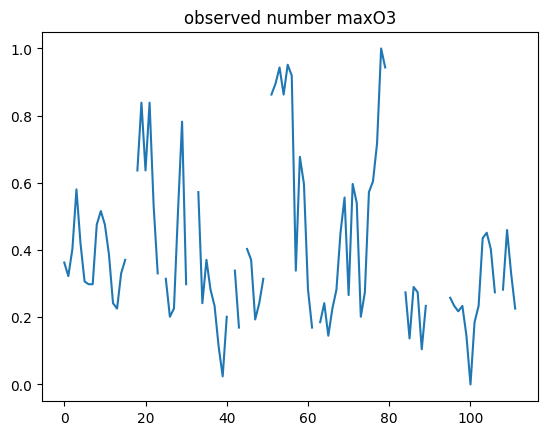

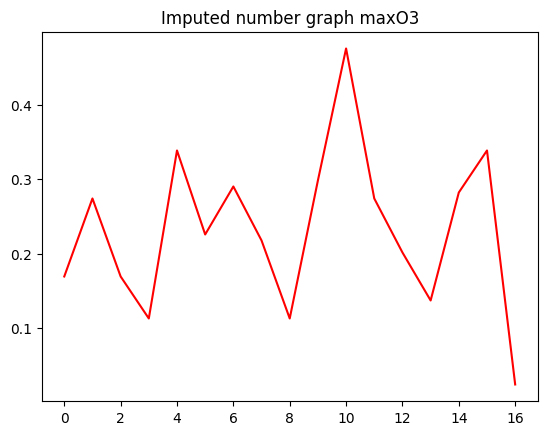

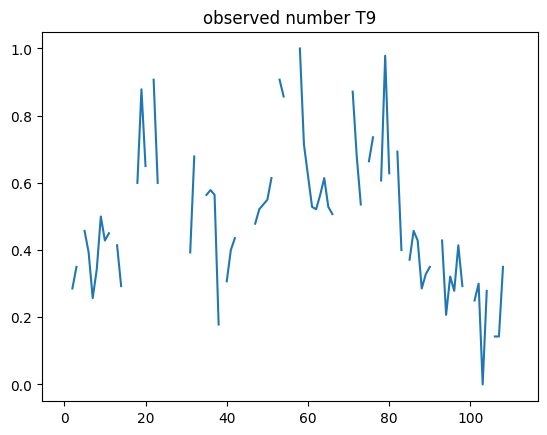

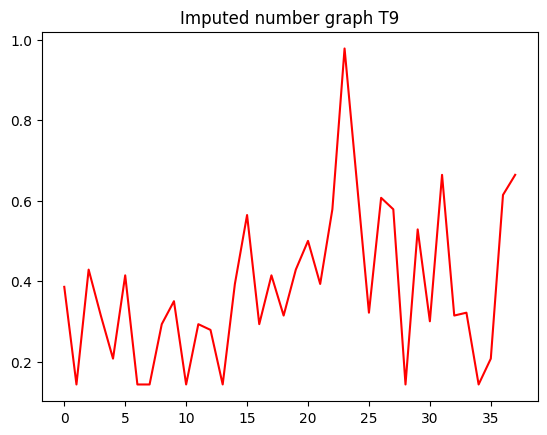

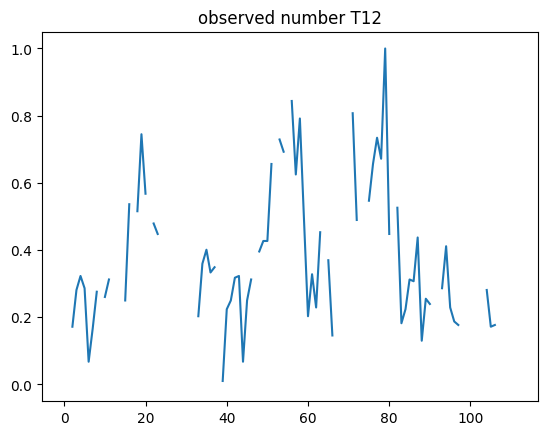

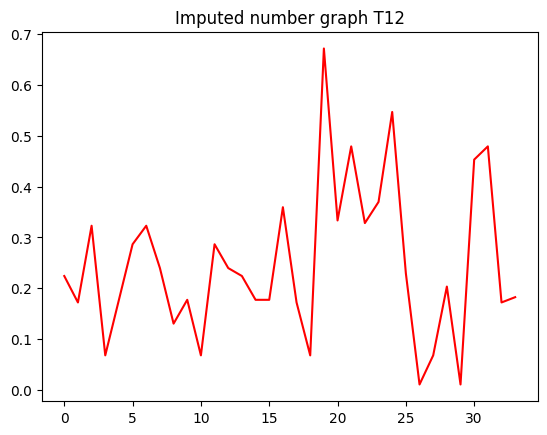

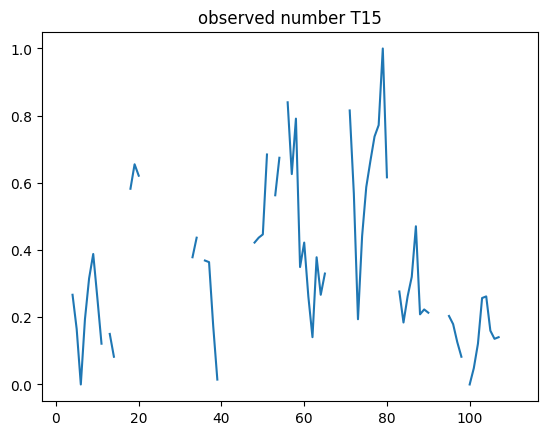

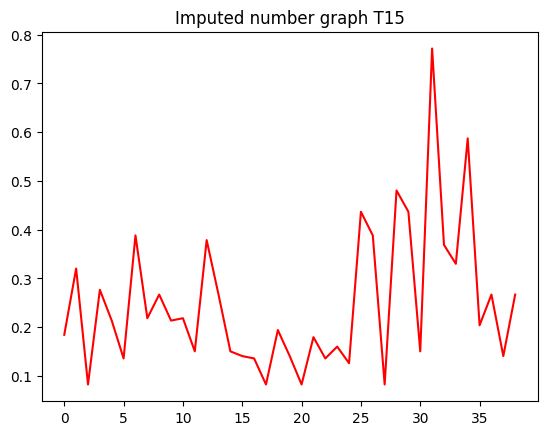

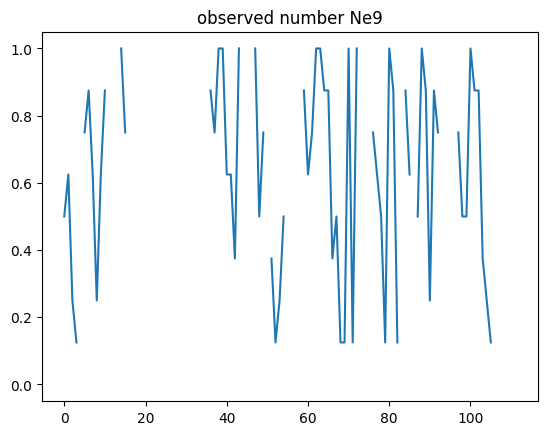

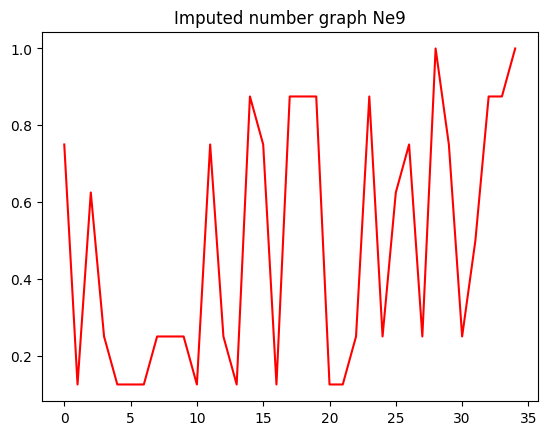

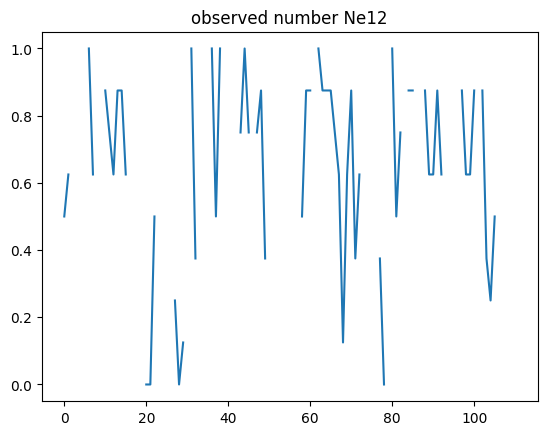

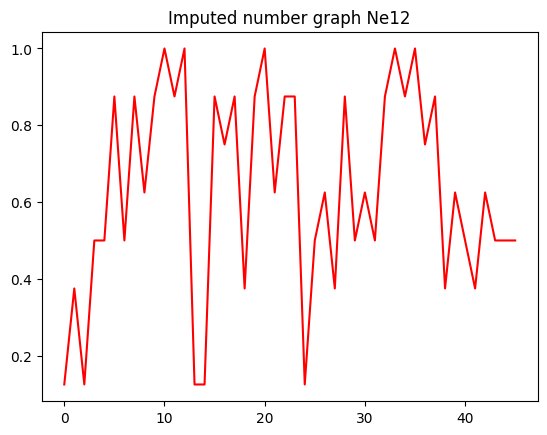

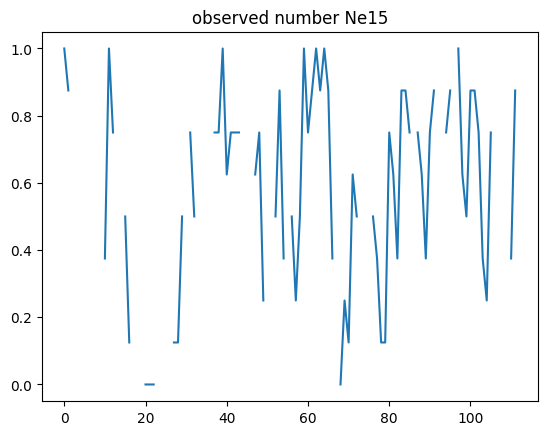

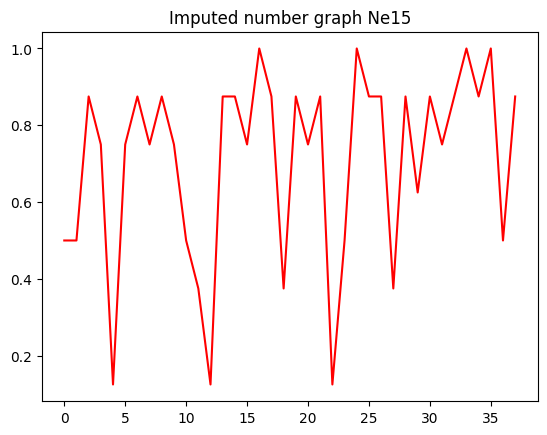

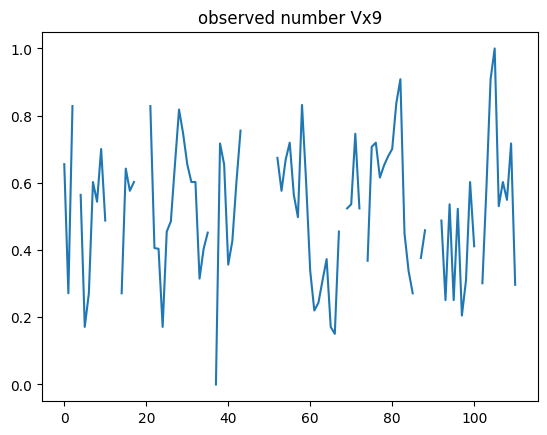

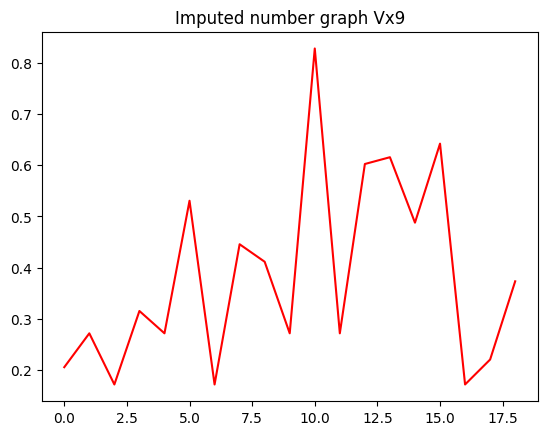

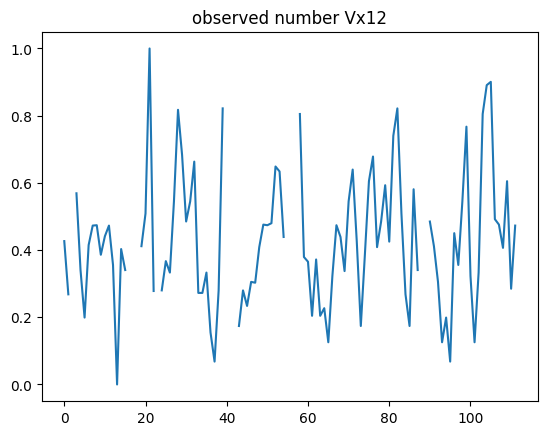

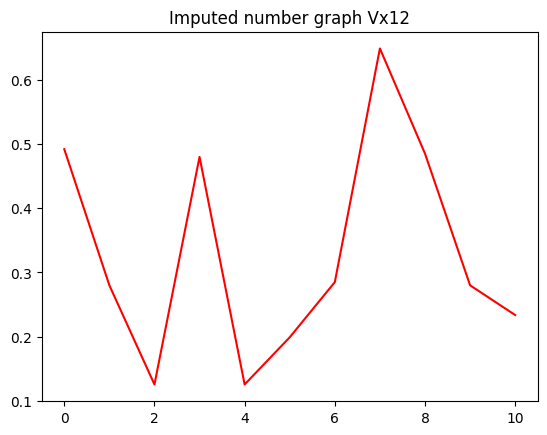

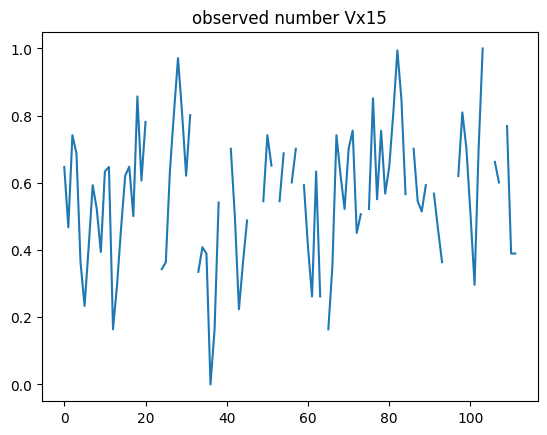

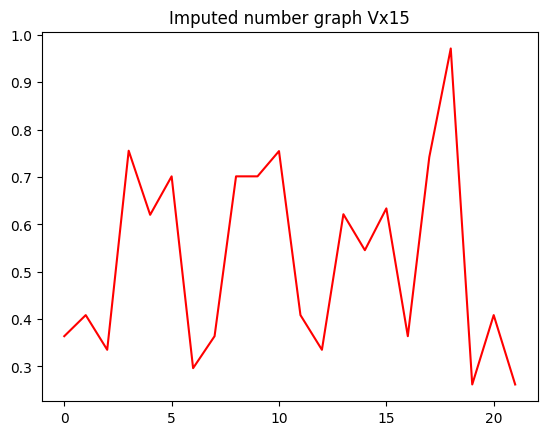

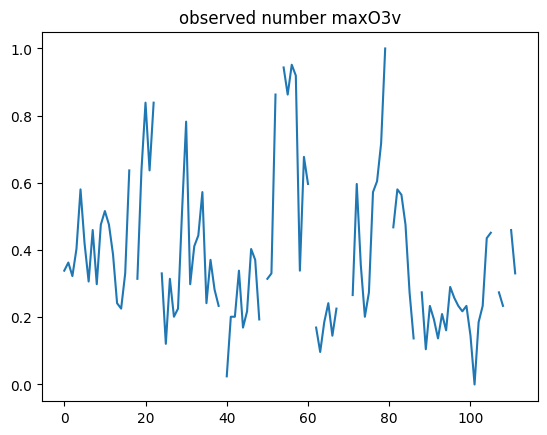

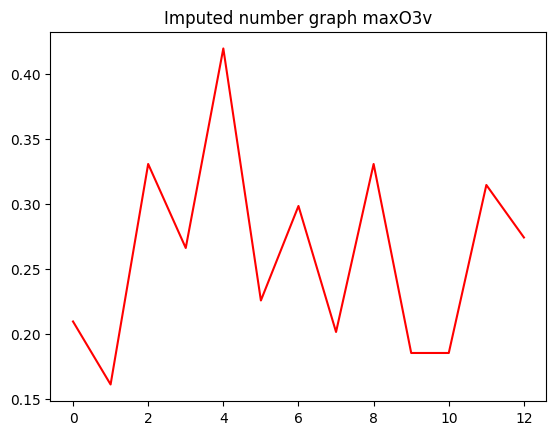

In [36]:
for i in range(11):
    plt.plot(df_norm[columns[i]])
    plt.title("observed number "+columns[i])
    plt.show()
    plt.plot(list_columns[i], color='red')
    plt.title("Imputed number graph " + columns[i])
    plt.show()